In [73]:
# Importing all required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


In [74]:
dataset = pd.read_csv("Downloads\\Rotten Tomatoes Movies.csv")# Reading data from csv file

In [75]:
# Using statistics to describe the dataset
describe_stats = dataset.describe()
print("Descriptive Statistics:\n", describe_stats)

Descriptive Statistics:
        runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16483.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
std             25.028011           28.587230          66.383800   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000   
50%             99.000000           66.000000          28.000000   
75%            111.000000           86.000000          76.000000   
max           2000.000000          100.000000         497.000000   

       audience_rating  audience_count  
count     16386.000000    1.638600e+04  
mean         60.470829    1.524797e+05  
std          20.462368    1.817736e+06  
min           0.000000    5.000000e+00  
25%          45.000000    8.642500e+02  
50%          62.000000    4.876500e+03  
75%          77.000000    2.875200e+04  
max         100.000000    3.579764

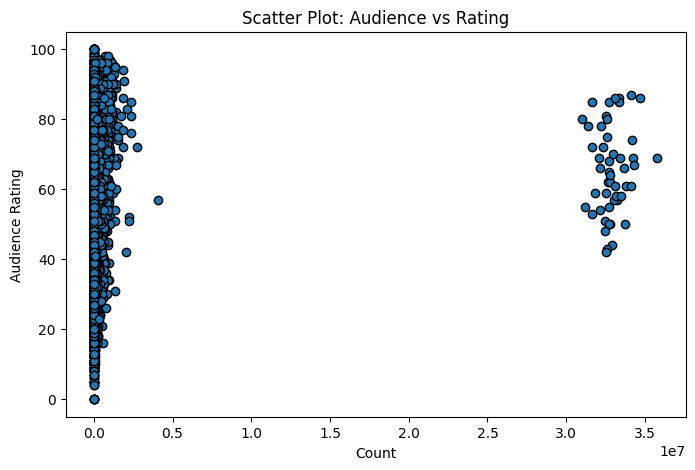

In [104]:
def plot_relational(data, x, y, title, xlabel, ylabel):
    """
    Code to represent scatter plot to convey an xy relationship.
    
   
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(data[x], data[y], alpha=1, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_relational(dataset, 'audience_count', 'audience_rating', 'Scatter Plot: Audience vs Rating', 'Count', 'Audience Rating')

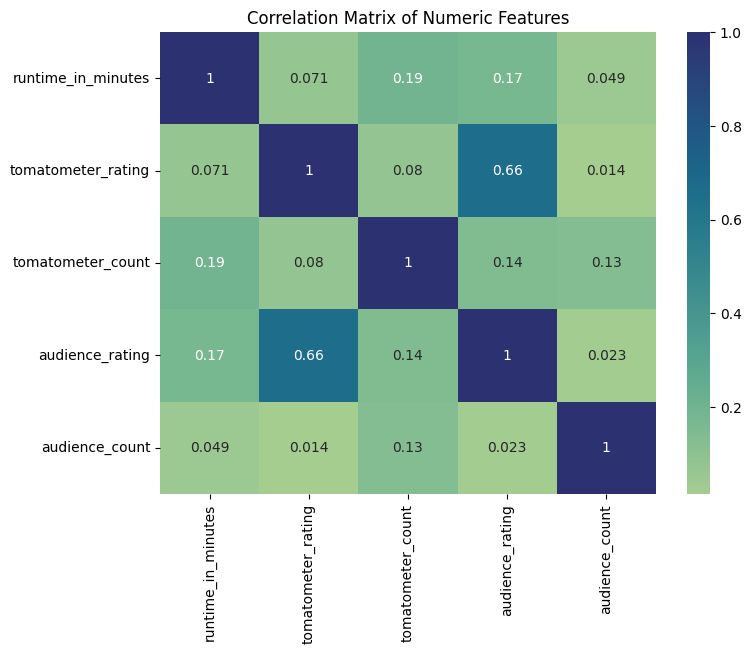

In [77]:
# plotting of heatmap to understand the correaltion between the variables of data set
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

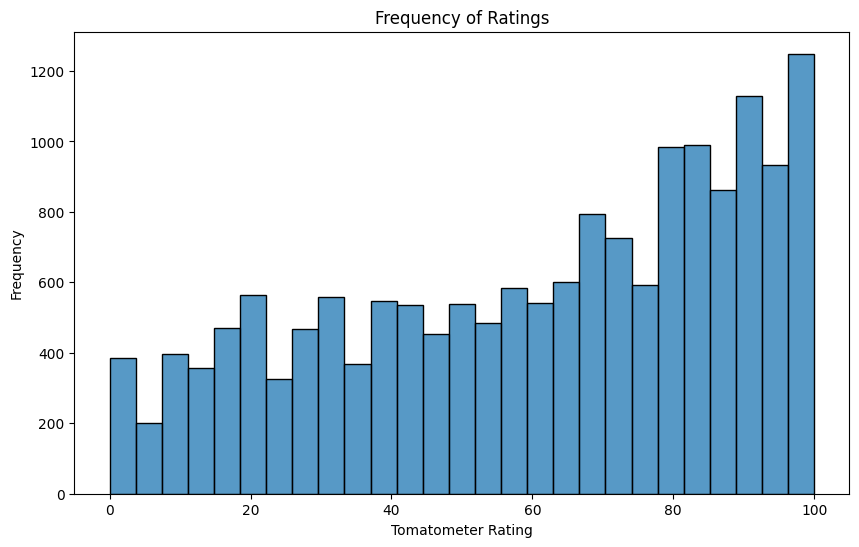

In [105]:
    plt.figure(figsize=(10, 6)) # Defining Figure Size
    sns.histplot(data=dataset,x="tomatometer_rating") # plotting histogram for type of work
    plt.xlabel("Tomatometer Rating") #Setting X Label
    plt.ylabel("Frequency") # Setting Y label
    plt.title("Frequency of Ratings")# Setting title
    plt.show() # showing the plot

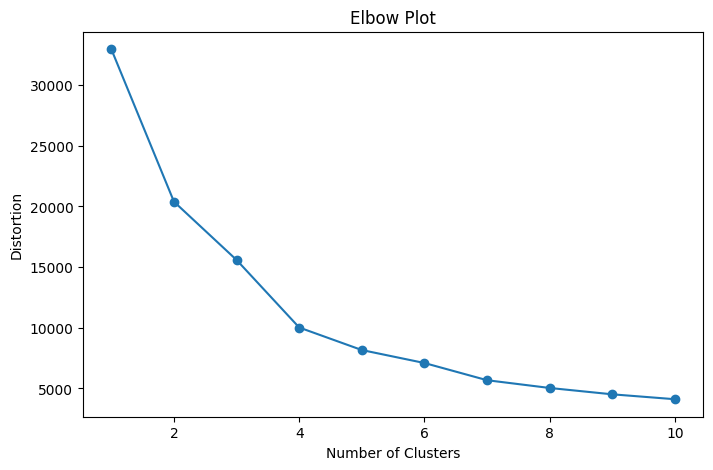

In [79]:
def perform_kmeans(dataset, n_clusters):
    """
    Performs k-means clustering and plots the elbow method.
    
   
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset)
    
    distortions = []
    for k in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    # Elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

    return scaled_data

# Prepare clustering data and generate Elbow Plot
clustering_data = dataset[['tomatometer_rating', 'runtime_in_minutes']].dropna()
scaled_clustering_data = perform_kmeans(clustering_data, 10)


Silhouette Score: 0.44


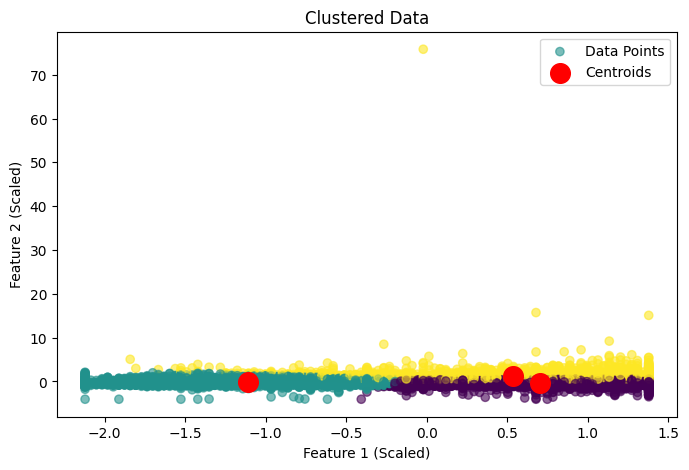

In [80]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
import numpy as np

dataset['tomatometer_rating'] = pd.to_numeric(dataset['tomatometer_rating'], errors='coerce')
# Ensure 'Episodes' column is converted to string before using .str methods
dataset['runtime_in_minutes'] = pd.to_numeric(dataset['runtime_in_minutes'], errors='coerce')


def evaluate_clustering(data, n_clusters):
    """
    Performs k-means clustering with silhouette evaluation.
    Plots cover data with colored groups and centers.

    
    """
    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Fit k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Back-scale cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
    
    # Plot clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title('Clustered Data')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.legend()
    plt.show()
    
    return kmeans, labels, centers

# Prepare clustering data
clustering_data = dataset[['tomatometer_rating', 'runtime_in_minutes']].dropna()
kmeans_model, cluster_labels, cluster_centers = evaluate_clustering(clustering_data, 3)

C:\Users\saikr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Silhouette Score: 0.41


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

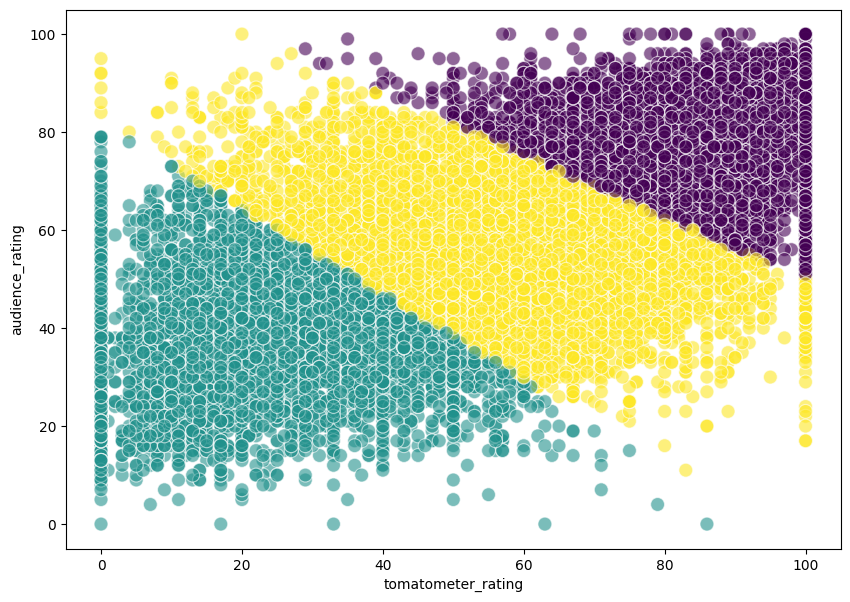

In [97]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean and prepare dataset
dataset['tomatometer_rating'] = pd.to_numeric(dataset['tomatometer_rating'], errors='coerce')
dataset['audience_rating'] =  pd.to_numeric(dataset['audience_rating'], errors='coerce')
"""
    showing predicted points and thier cluster groups 
    
"""

def clustering_predictions(data, n_clusters, prediction_points):
    
    
    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Fit k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Back-scale cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Predict new points
    scaled_prediction_points = scaler.transform(prediction_points)
    predictions = kmeans.predict(scaled_prediction_points)
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
    
    # Plot clusters with predictions
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette='viridis', alpha=0.6, s=100, label='Clusters')
    
    # Plot centroids
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Plot prediction points
    for i, point in enumerate(prediction_points):
        plt.scatter(point[0], point[1], color='purple', s=150, marker='D', label=f'Prediction {i+1}' if i == 0 else "")
        plt.text(
            point[0], point[1], f'Cluster {predictions[i]}', fontsize=10, ha='left', va='bottom', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
    
    plt.title('Clustered Data with Predictions')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return kmeans, labels, centers, predictions

# Prepare clustering data
clustering_data = dataset[['tomatometer_rating', 'audience_rating']].dropna()

# Define new prediction points
prediction_points = np.array([[7.5, 20], [8.0, 50], [6.5, 10]])

# Evaluate clustering and visualize predictions
kmeans_model, cluster_labels, cluster_centers, predictions = clustering_predictions(
    data=clustering_data,
    n_clusters=3,
    prediction_points=prediction_points
)

# Output predictions
for i, pred in enumerate(predictions):
    print(f"Prediction Point {i+1}: Cluster {pred}")
